In [1]:
import glob

In [13]:
#dataset

##train

strong_label_real_16k = glob.glob('/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/strong_label_real_16k/*.wav')
weak_16k = glob.glob("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/*.wav")
unlabel_in_domain_16k = glob.glob("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/unlabel_in_domain_16k/*.wav")
synth_train_16k = glob.glob("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/*.wav")



##validation
validation_16k = glob.glob("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/validation/validation_16k/*.wav")
synth_validation_16k = glob.glob("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/validation/synthetic21_validation/soundscapes_16k/*.wav")

In [7]:
len(strong_label_real_16k)

3470

In [8]:
len(weak_16k)

1578

In [10]:
len(unlabel_in_domain_16k)

14412

In [15]:
len(synth_train_16k)

10000

In [16]:
len(validation_16k)

1168

In [17]:
len(synth_validation_16k)

2500

## label

"Alarm_bell_ringing": 0,  
"Blender": 1,  
"Cat": 2,  
"Dishes": 3,  
"Dog": 4,  
"Electric_shaver_toothbrush": 5,  
"Frying": 6,  
"Running_water": 7,  
"Speech": 8,  
"Vacuum_cleaner": 9

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
strong_df = pd.read_csv("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/metadata/train/audioset_strong.tsv",sep="\t")

In [123]:
strong_df

,filename,onset,offset,event_label
0,Y--OMDPXfO6o_9.000_19.000.wav,0.000,9.785,Alarm_bell_ringing
1,Y--OMDPXfO6o_9.000_19.000.wav,1.556,9.415,Speech
2,Y--dr8rXrv8k_23.000_33.000.wav,1.667,2.657,Speech
3,Y--dr8rXrv8k_23.000_33.000.wav,0.000,0.541,Speech
4,Y--dr8rXrv8k_23.000_33.000.wav,2.849,3.480,Cat
...,...,...,...,...
15441,YzyBYTYWo4fs_90.000_100.000.wav,2.564,2.962,Dog
15442,Yzzz3PZXRQ_8_30.000_40.000.wav,0.000,0.909,Speech
15443,Yzzz3PZXRQ_8_30.000_40.000.wav,3.608,6.557,Speech
15444,Yzzz3PZXRQ_8_30.000_40.000.wav,1.070,1.874,Speech


In [124]:
strong_df['event_label'].value_counts()

Speech                        8246
Dishes                        2017
Alarm_bell_ringing            1723
Dog                           1379
Running_water                  596
Frying                         526
Cat                            440
Blender                        219
Electric_shaver_toothbrush     214
Vacuum_cleaner                  86
Name: event_label, dtype: int64

In [22]:
synth_train_df = pd.read_csv("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/metadata/train/synthetic21_train/soundscapes.tsv", sep="\t")

In [23]:
synth_train_df

,filename,onset,offset,event_label
0,0.wav,4.151,4.410,Speech
1,0.wav,4.190,5.888,Dog
2,1.wav,0.000,10.000,Frying
3,1.wav,4.591,4.841,Dishes
4,1.wav,5.458,7.572,Speech
...,...,...,...,...
32091,9998.wav,3.644,10.000,Alarm_bell_ringing
32092,9998.wav,3.969,10.000,Speech
32093,9999.wav,0.594,2.392,Speech
32094,9999.wav,1.225,7.581,Alarm_bell_ringing


In [138]:
synth_train_df[synth_train_df['filename']=='1004.wav']

,filename,onset,offset,event_label
28,1004.wav,0.000,10.000,Frying
29,1004.wav,7.762,8.527,Speech
30,1004.wav,8.488,10.000,Dishes


In [133]:
synth_train_df[synth_train_df['event_label']=="Frying"]

,filename,onset,offset,event_label
2,1.wav,0.000,10.000,Frying
20,1002.wav,1.491,10.000,Frying
28,1004.wav,0.000,10.000,Frying
44,1009.wav,0.000,10.000,Frying
60,1013.wav,2.289,9.837,Frying
...,...,...,...,...
32020,9981.wav,0.000,10.000,Frying
32047,9988.wav,0.000,10.000,Frying
32055,999.wav,0.000,10.000,Frying
32061,9990.wav,2.452,10.000,Frying


In [24]:
synth_train_df.event_label.value_counts()

Speech                        15880
Dishes                         4338
Dog                            2289
Alarm_bell_ringing             1986
Cat                            1861
Frying                         1349
Running_water                  1224
Electric_shaver_toothbrush     1096
Vacuum_cleaner                 1046
Blender                        1027
Name: event_label, dtype: int64

In [52]:
weak_label_df = pd.DataFrame(synth_train_df.event_label.value_counts()).reset_index()

In [53]:
weak_label_df

,index,event_label
0,Speech,15880
1,Dishes,4338
2,Dog,2289
3,Alarm_bell_ringing,1986
4,Cat,1861
5,Frying,1349
6,Running_water,1224
7,Electric_shaver_toothbrush,1096
8,Vacuum_cleaner,1046
9,Blender,1027


In [69]:
colors = sns.color_palette('hls',10)

<BarContainer object of 10 artists>

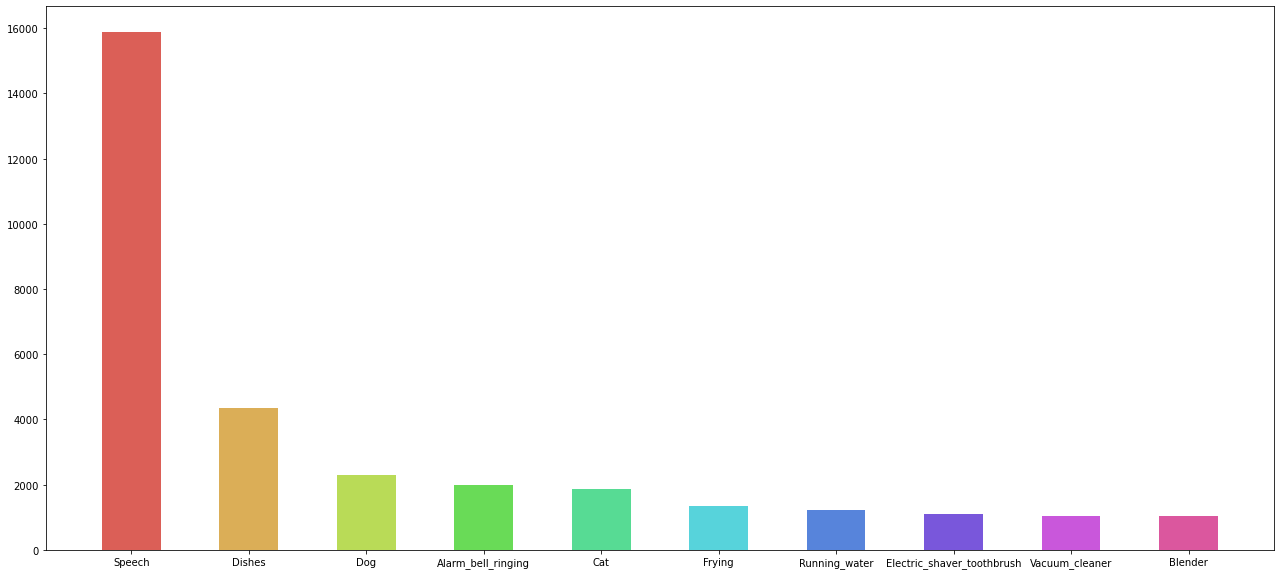

In [75]:
plt.figure(figsize=(22,10))
plt.bar(weak_label_df['index'],weak_label_df['event_label'], width=0.5, color=colors)

In [26]:
os.path.join('/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k', 'YKK227gPpRn4_30.000_40.000.wav'[:-4]+'.pickle')

'/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/YKK227gPpRn4_30.000_40.000.pickle'

In [25]:
weak_df = pd.read_csv("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/metadata/train/weak.tsv", sep="\t")

In [26]:
weak_df

,filename,event_labels
0,YKK227gPpRn4_30.000_40.000.wav,"Alarm_bell_ringing,Speech"
1,Y-6p32k2WUCs_0.000_10.000.wav,Alarm_bell_ringing
2,Y-Zjgm_sZd10_0.000_4.000.wav,Alarm_bell_ringing
3,Y-ikrSfqB0LU_0.000_3.000.wav,Alarm_bell_ringing
4,Y26ubekDhG_Y_0.000_10.000.wav,Alarm_bell_ringing
...,...,...
1573,YUW0vfC5UjQg_140.000_150.000.wav,"Electric_shaver_toothbrush,Speech"
1574,YiDBWBvuYOQk_30.000_40.000.wav,"Electric_shaver_toothbrush,Speech"
1575,Yqc61mzzSIxM_30.000_40.000.wav,"Electric_shaver_toothbrush,Speech"
1576,YyfSco9z1fpw_190.000_200.000.wav,"Electric_shaver_toothbrush,Speech"


In [41]:
weak_label_lst = []
for i, row in weak_df.iterrows():
    weak_label_lst.extend(row['event_labels'].split(','))
    
weak_label_df = pd.DataFrame(weak_label_lst, columns=['weak_label'])

weak_label_df['weak_label'].value_counts()

Speech                        550
Running_water                 345
Dog                           214
Alarm_bell_ringing            206
Dishes                        184
Cat                           173
Frying                        171
Vacuum_cleaner                167
Blender                       134
Electric_shaver_toothbrush    103
Name: weak_label, dtype: int64

In [1]:
import librosa
import numpy as np
import librosa.display
%matplotlib inline

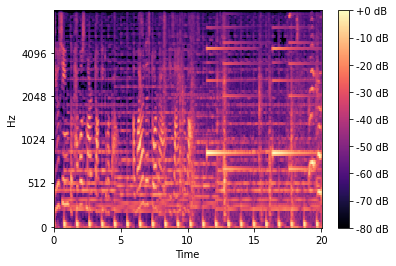

In [7]:
y, sr = librosa.load('/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/YKK227gPpRn4_30.000_40.000.wav',sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')    #'Alarm_bell_ringing', 'Speech'

In [14]:
S

array([[3.6218208e-01, 3.9653182e-01, 2.9563183e-01, ..., 5.7228482e-01,
        6.1745656e-01, 4.6544671e-01],
       [4.6127751e-01, 1.1273140e+00, 1.5452430e+00, ..., 1.8595821e-01,
        2.0891589e-01, 2.1134141e-01],
       [8.8719231e-01, 1.6855465e+00, 1.7572682e+00, ..., 1.1490804e-01,
        1.1063116e-01, 1.2199570e-01],
       ...,
       [6.7386514e-05, 3.2082226e-04, 6.3472404e-04, ..., 4.5672018e-04,
        4.9437745e-04, 4.9388187e-04],
       [2.2618038e-05, 1.1045635e-04, 2.2327689e-04, ..., 1.4035002e-04,
        2.9413268e-04, 3.6847813e-04],
       [1.1787628e-06, 2.8841205e-06, 5.3172639e-06, ..., 5.8712540e-05,
        1.6923489e-04, 2.3278163e-04]], dtype=float32)

In [5]:
S.mean(axis=1).shape

(128,)

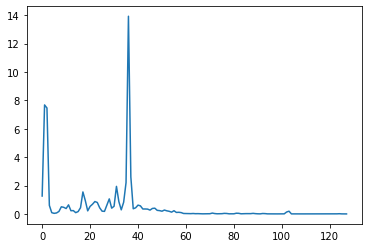

In [13]:
plt.plot(S.mean(axis=1))

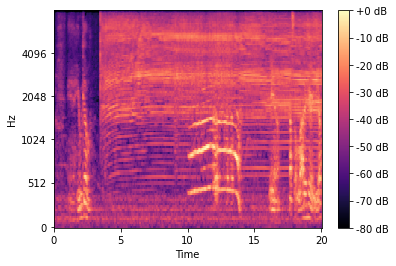

In [17]:
y, sr = librosa.load('/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/YUW0vfC5UjQg_140.000_150.000.wav',sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')    #Electric_shaver_toothbrush,Speech

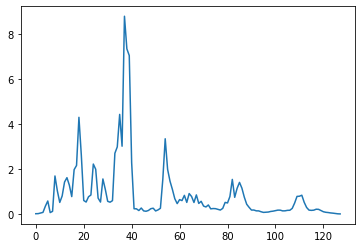

In [23]:
plt.plot(S.mean(axis=1))

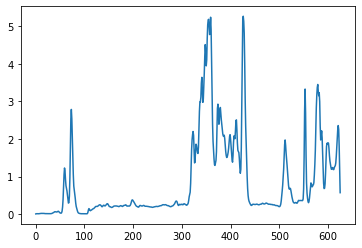

In [21]:
plt.plot(S.mean(axis=0))

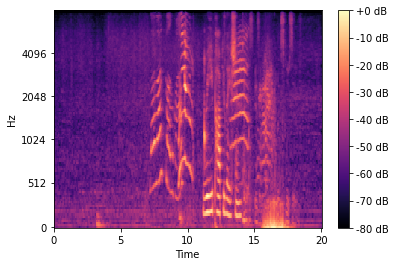

In [4]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/1003.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')    #Speech, Cat

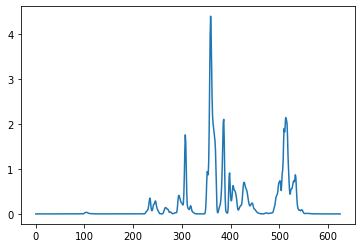

In [6]:
plt.plot(S.mean(axis=0))

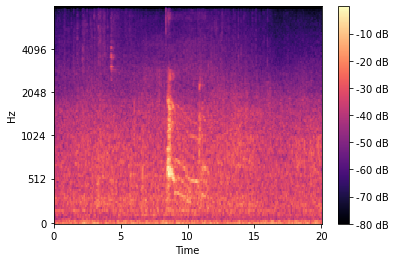

In [104]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/0.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')    #Speech, Dog

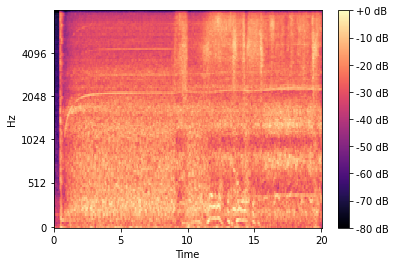

In [128]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/9956.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')    #Speech, Vacuum_cleaner

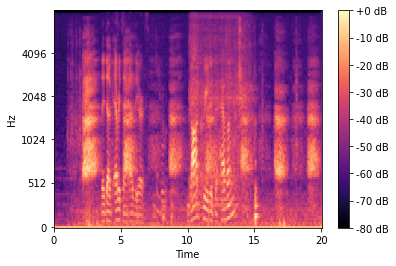

In [119]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/100.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')    #Speech, Blender

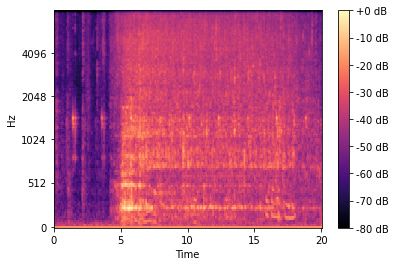

In [125]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/1005.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')   #Running_water, Speech

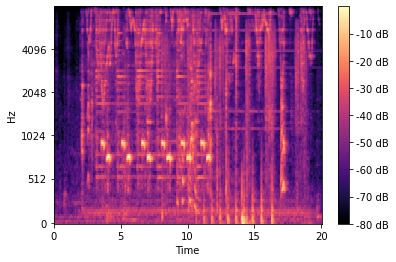

In [109]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/1015.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')   #Alarm_bell_ringing, Dog, Speech

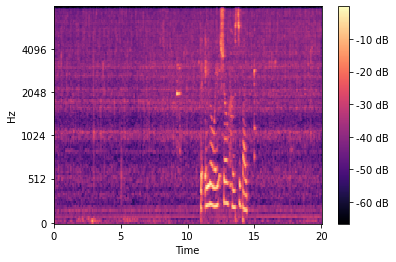

In [114]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/1.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,ax=ax,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')    #Dishes, Frying, Speech

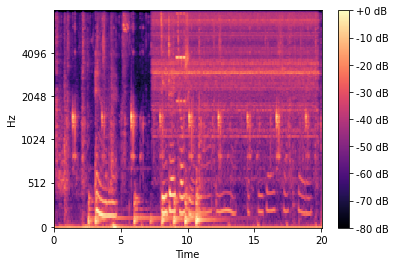

In [106]:
y, sr = librosa.load("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/dcase_synth/audio/train/synthetic21_train/soundscapes_16k/9998.wav",sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length=256, win_length=2048,
                                    fmax=8000)
fig = plt.figure()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
fig.colorbar(img, format='%+2.0f dB')   #Alarm_bell_ringing, Speech

In [32]:
clips = {}
for _, row in weak_df.iterrows():
    if row["filename"] not in clips.keys():
        clips[row["filename"]] = {"path": os.path.join("/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k", row["filename"]),
                                          "events": row["event_labels"].split(",")}
        

In [38]:
clips

{'YKK227gPpRn4_30.000_40.000.wav': {'path': '/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/YKK227gPpRn4_30.000_40.000.wav',
  'events': ['Alarm_bell_ringing', 'Speech']},
 'Y-6p32k2WUCs_0.000_10.000.wav': {'path': '/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/Y-6p32k2WUCs_0.000_10.000.wav',
  'events': ['Alarm_bell_ringing']},
 'Y-Zjgm_sZd10_0.000_4.000.wav': {'path': '/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/Y-Zjgm_sZd10_0.000_4.000.wav',
  'events': ['Alarm_bell_ringing']},
 'Y-ikrSfqB0LU_0.000_3.000.wav': {'path': '/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/Y-ikrSfqB0LU_0.000_3.000.wav',
  'events': ['Alarm_bell_ringing']},
 'Y26ubekDhG_Y_0.000_10.000.wav': {'path': '/home/jh20/narin/dcase/DESED_task/data/dcase/dataset/audio/train/weak_16k/Y26ubekDhG_Y_0.000_10.000.wav',
  'events': ['Alarm_bell_ringing']},
 'Y2xXpSgqrtDE_40.000_50.000.wav': {'path': '/home/jh20/n

## raw wav 전처리

In [1]:
from utils.settings import *
from utils.model import *

In [2]:
configs, server_cfg, train_cfg, feature_cfg = get_configs(config_dir="./configs/config.yaml")
LabelDict = get_labeldict()

In [3]:
train_cfg["encoder"] = get_encoder(LabelDict, feature_cfg, feature_cfg["audio_max_len"])

In [61]:
train_cfg = get_mt_datasets(configs, server_cfg, train_cfg)

In [162]:
a , b, _, _ = next(iter(train_cfg['trainloader']))

### 전처리

오디오 10초  
패딩  
sampling rate : 16khz

wav dim > [bs, 160000]


In [161]:
a.shape    # raw wav

torch.Size([16, 160000])

In [163]:
b.shape  # strong label 

torch.Size([16, 10, 156])

In [154]:
train_cfg["feat_ext"] = setmelspectrogram(feature_cfg)

In [165]:
train_cfg["feat_ext"](a).shape  # mel spectrogram

torch.Size([16, 128, 626])

## model


FDY-CRNN 의 input : log mel spec  
input size : [bs, 128, 626] / [bs, freqs, time] > [bs 1, 626, 128] / [bs, 1, time, freqs]

cnn input : [bs 1, 626, 128] / cnn output : [bs, 256, 156, 1]  [bs, channel, time, freqs]

rnn input : [bs, 156, 256] / rnn output : [bs, 156, 512]

dense input : [bs, 156, 512] / dense output : [bs, 156, 10] [ bs, time(frames), n_class ]

In [40]:
x = torch.randn(4,1,768,249)

In [12]:
y = torch.randn(4,1,625,128)

In [36]:
net1 = CRNN(**configs["CRNN"])

In [37]:
net1

CRNN(
  (cnn): CNN(
    (cnn): Sequential(
      (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batchnorm0): BatchNorm2d(32, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
      (cg0): ContextGating(
        (sigmoid): Sigmoid()
        (linear): Linear(in_features=32, out_features=32, bias=True)
      )
      (dropout0): Dropout(p=0.5, inplace=False)
      (pooling0): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
      (conv1): Dynamic_conv2d(
        (attention): attention2d(
          (conv1d1): Conv1d(32, 8, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
          (bn): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv1d2): Conv1d(8, 4, kernel_size=(1,), stride=(1,))
        )
      )
      (batchnorm1): BatchNorm2d(64, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
      (cg1): ContextGating(
        (sigmoid): 

In [41]:
output = net1.cnn(x)

In [42]:
output.shape

torch.Size([4, 256, 192, 1])

In [15]:
output = output.squeeze(-1)

In [18]:
output = output.permute(0, 2, 1)

In [24]:
output.shape

torch.Size([4, 156, 256])

In [35]:
y = torch.randn(4,156,256)

In [36]:
rnn_output = net.rnn(y)

In [37]:
rnn_output.shape

torch.Size([4, 156, 512])

In [38]:
dense_output = net.dense(rnn_output)

In [39]:
dense_output.shape

torch.Size([4, 156, 10])

In [132]:
import torch.nn as nn
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.conv2d = nn.Conv2d(1,32,kernel_size=3, stride=1,padding=1)
        self.avgpool1 = nn.AvgPool2d((2,2))
        self.avgpool2 = nn.AvgPool2d((2,2))
        self.avgpool3 = nn.AvgPool2d((1,2))
        self.avgpool4 = nn.AvgPool2d((1,2))
        self.avgpool5 = nn.AvgPool2d((1,2))
        self.avgpool6 = nn.AvgPool2d((1,2))
        self.avgpool7 = nn.AvgPool2d((1,2))
    
        
    def forward(self, x):
        x = self.conv2d(x)
        x = self.avgpool1(x)
        print(x.shape)
        x = self.avgpool2(x)
        print(x.shape)
        x = self.avgpool3(x)
        print(x.shape)
        x = self.avgpool4(x)
        x = self.avgpool5(x)
        print(x.shape)
        x = self.avgpool6(x)
        print(x.shape)
        x = self.avgpool7(x)
        print(x.shape)
        return x

In [135]:
import torch
x = torch.randn(1,1,626,128)
net = model()

In [136]:
output = net(x)

torch.Size([1, 32, 313, 64])
torch.Size([1, 32, 156, 32])
torch.Size([1, 32, 156, 16])
torch.Size([1, 32, 156, 4])
torch.Size([1, 32, 156, 2])
torch.Size([1, 32, 156, 1])


In [2]:
x = 0

if x:
    print(x)

In [137]:
class depthwise_separable_conv(nn.Module):
    def __init__(self, nin, nout):
        super(depthwise_separable_conv, self).__init__()
        self.depthwise = nn.Conv2d(nin, nout, kernel_size=3, stride=1, padding=1, groups=8)
        self.pointwise = nn.Conv2d(nout, nout, kernel_size=1)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out

In [139]:
net =depthwise_separable_conv(32,64)

In [140]:
x = torch.rand(4,32,315,64)


output = net(x)

In [142]:
output.shape

torch.Size([4, 64, 315, 64])

In [162]:
net = AttBlock(512,10)

In [163]:
x = torch.randn(4,512,156)

In [164]:
output = net(x)

torch.Size([4, 512, 156])
torch.Size([4, 156, 10])
torch.Size([4, 156, 10])
torch.Size([4, 512, 156])
torch.Size([4, 156, 10])
torch.Size([4, 156, 10])
torch.Size([4, 10])


In [166]:
output[0].shape

torch.Size([4, 10])